# OpenCV basic image processing #2 

OpenCV (Open Source Computer Vision Library) is a powerful Python module widely used for computer vision and image processing tasks. It provides a vast array of tools for **real-time image manipulation**, **video analysis**, and **machine learning (ML)**, enabling developers to **detect and track objects**, **recognize patterns**, and perform tasks like **face detection** or **edge detection**. OpenCV supports multiple programming languages, including __Python__, C++, and Java, and works efficiently across platforms. With extensive support for hardware acceleration and integration with libraries like __NumPy__, OpenCV is ideal for applications requiring high-speed image and video processing. Its open-source nature and active community make it a popular choice in research, development, and production environments.

__Aim:__
Start with the 'OpenCV_imageproc_01.ipynb' notebook if you wish to
- start with the basic concepts of image processing/modification
- learning simple openCV modules, getting used to function names, and the parameters that can have effect on the output
- to prepare for more advanced and complex functions of the OpenCV (see openCV_imageproc_02.ipynb in the same folder)
and understand the basic concepts as:
- first of all installing the OpenCV module,
- creating a full black image that will be used for modifications (drawing),
- discovering image properties,
- drawing shapes on an image (full black or else, not important!),
- understanding 3 layered image array stack nature
- understanding pixel values (channel/color intensities)
- creating simple color intensity histograms (for each/all color channels).
  
This tutorial is aiming to demonstrate how to use/apply
__Steps/Methods/functions:__
such as
- overlay images,
- recolor images in a way of mixing up channels,
- resize (magnifying, diminishing) image and consequently resize the visualization (figure/frame size),
- create replicative borders (frame edges) of the image,
- free ('any' angle) rotate images,
- convert color image to grayscale,
- simple tresholding with various solution,
- detect edges of objects,
- Smoothing & blurring images.


__Config&environment:__
Suggested (tested) for
- OpenCV-Python Version 4.10.0, or above (Jan 2025).
- Numpy 1.26.4 or above,
- requires scikit image (for image loads from the internet)
Check whether opencv is already installed. If not, the code in the next cell will fail (ModuleNotFound).

In [1]:
import cv2
from skimage import io
from matplotlib import pyplot as plt

## Import an online image using SkImage IO module

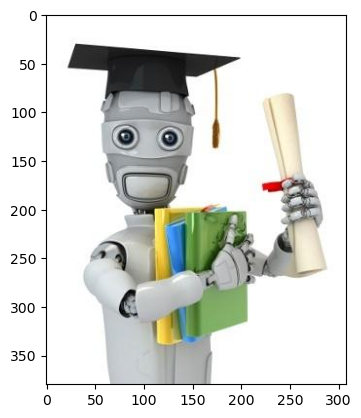

In [2]:
img1 = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/ml.png?raw=true')
plt.imshow(img1)

## Merging/overlaying 2 images
Two identical size (!) images can be overlayed, declaring the transparency for each image.

Use the __cv2.addWeighted()__ function in a way that the parameters are the followings: image1 (array), alpha1 (0-1 value), image2 array, alpha2, gamma layer value (0-1 value).
alpha may vary in the range of (0-1 value), where alpha=0 corresponds to no transparency, 1 is fully transparent,

gamma values may vary in a wider range, and gamma=0 corresponds to no gray level added to the image, and in case of e.g. 50 the whole image becomes less intense (bright). 

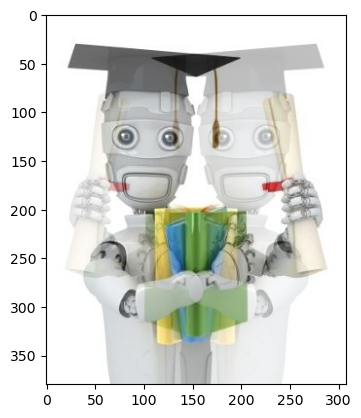

In [3]:
img2 = cv2.flip(img1, 1) #image flipped over vertical axis
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)
plt.imshow(dst)

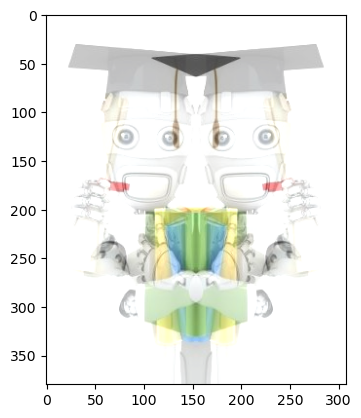

In [14]:
dst = cv2.addWeighted(img1,0.5,img2,0.5,50) #image1 array, alpha1, image2 array, alpha2, gamma layer value)
plt.imshow(dst)

Loading the butterfly results a more colorful image, perfect for color related demonstrations.

image size (px):  (356, 493)


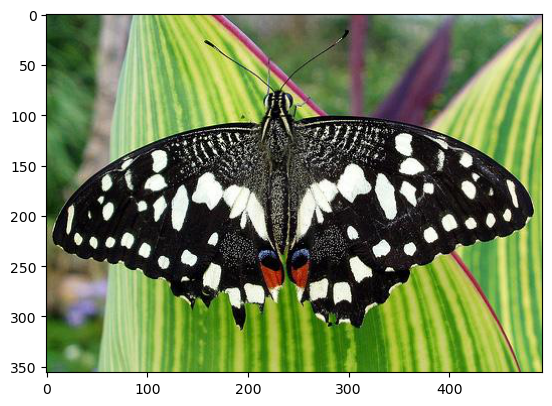

In [4]:
butterfly_orig = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/butterfly.jpg?raw=true')
butterfly = butterfly_orig.copy() # safety copy
print('image size (px): ', butterfly.shape[0:2]) #note the X and Y resolution order!
plt.imshow(butterfly)

(3560, 4930, 3)


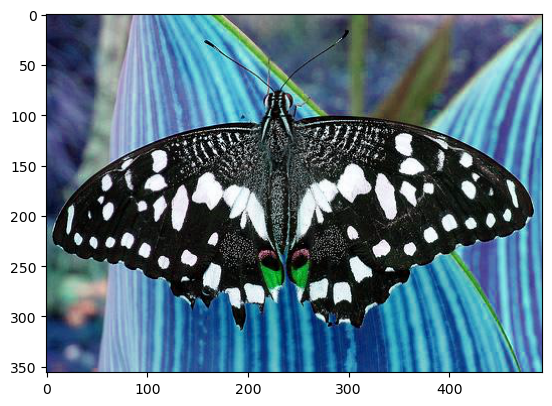

In [22]:
# splitting and re-merging (in different order) the image color channels
b,g,r = cv2.split(butterfly)
butterfly_recolored = cv2.merge((r,b,g))
print(butterfly_res.shape)
plt.imshow(butterfly_recolored)

For sure you would recognise that 'something is odd' with the image above. Learn the color channel standard for the stored image file (RGB) and for visualization (loading) by softwares, in case of openCV it is BGR, while in general for other visualizations tools it is RGB.

## Image rescale

image size (px):  (36, 49)


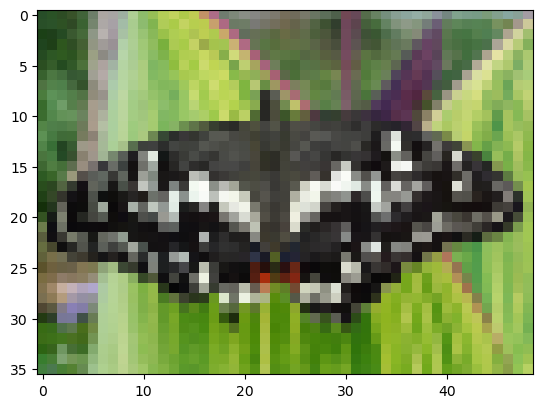

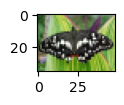

In [5]:
# Scaling down
butterfly_res = cv2.resize(butterfly,(49,36), interpolation = cv2.INTER_AREA)
print('image size (px): ', butterfly_res.shape[0:2])
plt.imshow(butterfly_res)
#resizing figure to match pixel size
plt.figure(figsize=(1, 2))
plt.imshow(butterfly_res)

In [42]:
# Scaling up (anothter way)
butterfly_magn = cv2.resize(butterfly,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC) # or cv2.INTER_AREA
print('image size (px): ', butterfly_magn.shape[0:2]) # no plot just the size

image size (px):  (712, 986)


## Create a border around the image like a photo frame

(<Axes: title={'center': 'CONSTANT'}>,
 Text(0.5, 1.0, 'CONSTANT'))

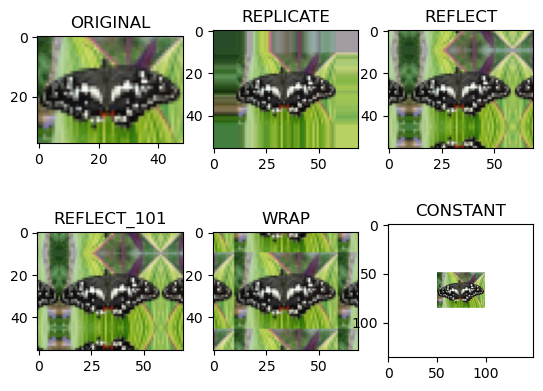

In [6]:
img = butterfly_res
replicate = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img,50,50,50,50,cv2.BORDER_CONSTANT,value=[255,255,255])

plt.subplot(231),plt.imshow(img),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant),plt.title('CONSTANT')

## Rotation

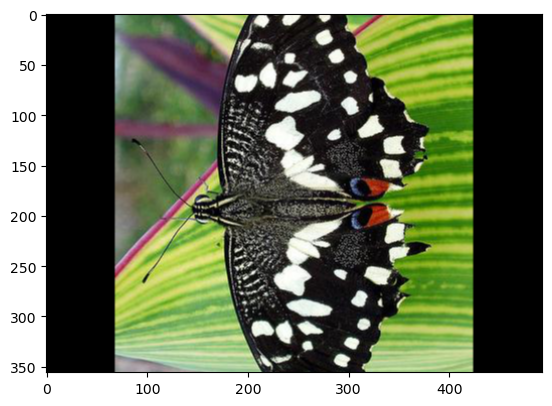

In [7]:
# Rotation 1: to the left, by 90°
rows,cols,chan_num = butterfly.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
butterfly_rotleft = cv2.warpAffine(butterfly, M, (cols,rows))
plt.imshow(butterfly_rotleft) 

It would be optimal if the image is squared

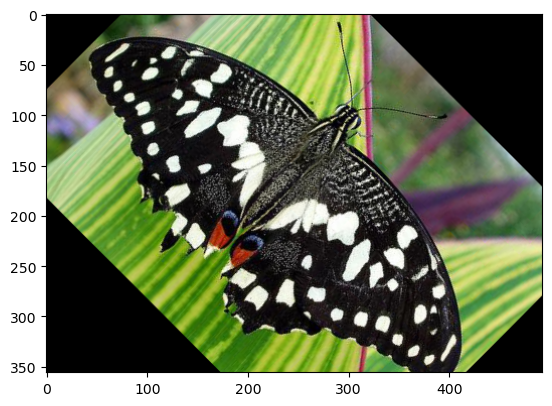

In [8]:
# Rotation 2, to the right by 45°
#rows,cols,chan_num = butterfly.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),-45,1)
butterfly_rotright = cv2.warpAffine(butterfly, M, (cols,rows))
plt.imshow(butterfly_rotright)

## Overlay (identical) size images

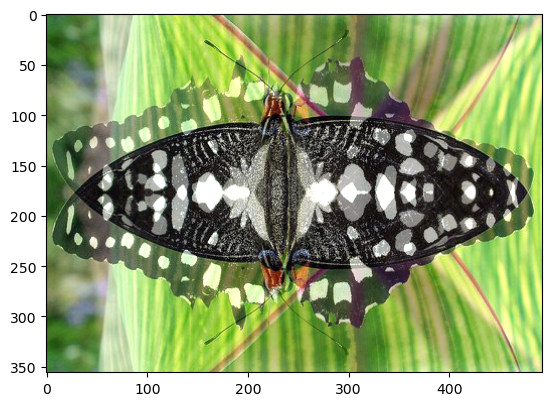

In [15]:
flipped_butterfly = cv2.flip(butterfly, 0) #image flipped over vertical axis
butterflies = cv2.addWeighted(butterfly,0.7,flipped_butterfly,0.5,0)
plt.imshow(butterflies)

## Convert to grayscale

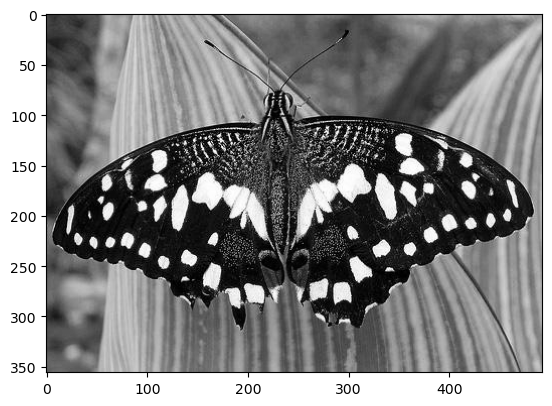

In [55]:
butterfly_gray = cv2.cvtColor(butterfly, cv2.COLOR_BGR2GRAY)
#cv2.imshow('Grayscale', butterfly_gray)
#cv2.waitKey(0) #for a pop-up window
plt.imshow(butterfly_gray, cmap='grey')

## Simple tresholding

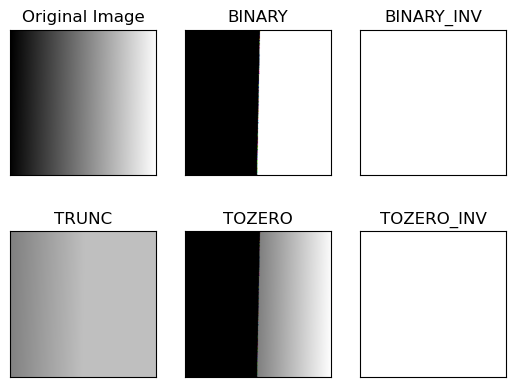

In [48]:
# Simple Thresholding
img = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/gradient.png?raw=true')
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

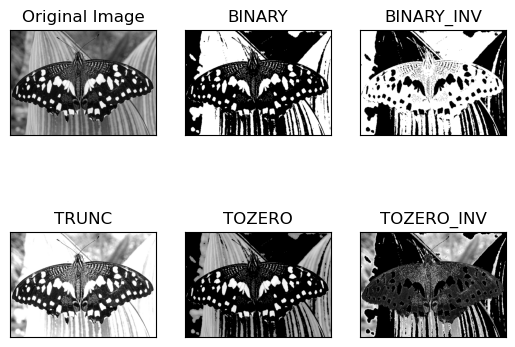

In [56]:
img = butterfly_gray
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## Edge detection
This can be useful when an object should be found or several objects should be counted and color does not matter. But if color  matters then still finding the edge of the object(s) is an important step in further processing.

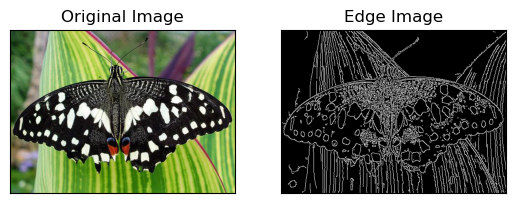

In [62]:
# Canny Edge Detection
edges = cv2.Canny(butterfly,100,200)

plt.subplot(121),plt.imshow(butterfly,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

## Smoothing & blurring images
Ref: https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

In [19]:
import numpy as np # module for arrays
logo = io.imread('https://github.com/opencv/opencv/blob/master/samples/data/opencv-logo.png?raw=true')
img = logo.copy()

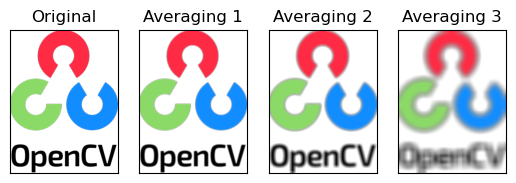

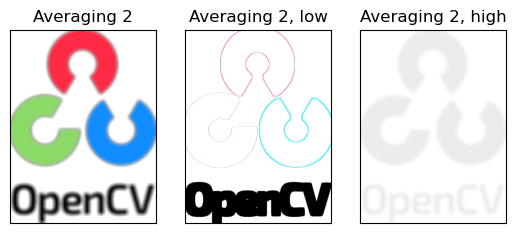

In [27]:
# 2D Convolution ( Image Filtering )

kernel1 = np.ones((7,7),np.float32)/49 # np.ones(X,Y) array should be square: X=Y; divide by the value of X*Y (=X^2) 
dst1 = cv2.filter2D(img,-1,kernel1)
kernel2 = np.ones((20,20),np.float32)/400 
dst2 = cv2.filter2D(img,-1,kernel2)
kernel3 = np.ones((50,50),np.float32)/2500 
dst3 = cv2.filter2D(img,-1,kernel3)
kernel4 = np.ones((20,20),np.float32)/9 
dst4 = cv2.filter2D(img,-1,kernel4)
kernel5 = np.ones((20,20),np.float32)/5000
dst5 = cv2.filter2D(img,-1,kernel5)

plt.subplot(141),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(dst1),plt.title('Averaging 1')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(dst2),plt.title('Averaging 2')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(dst3),plt.title('Averaging 3')
plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(131),plt.imshow(dst2),plt.title('Averaging 2')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dst4),plt.title('Averaging 2, low')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(dst5),plt.title('Averaging 2, high')
plt.xticks([]), plt.yticks([])
plt.show()

Applying blur

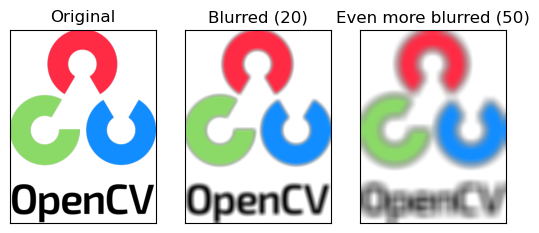

In [29]:
# Image Blurring (Image Smoothing)
blur = cv2.blur(img,(20,20))
blur2 = cv2.blur(img,(50,50))

plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur),plt.title('Blurred (20)')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur2),plt.title('Even more blurred (50)')
plt.xticks([]), plt.yticks([])
plt.show()

In [37]:
# Gaussian Filtering
blur_gauss = cv2.GaussianBlur(img,(15,15),cv2.BORDER_DEFAULT) # kernel size should be odd, may be different in X/Y

# Median Filtering (highly effective in removing salt-and-pepper noise)
blur_median = cv2.medianBlur(img,15)


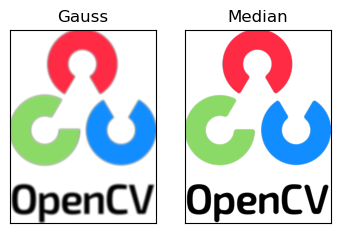

In [38]:
plt.subplot(131),plt.imshow(blur_gauss),plt.title('Gauss')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur_median),plt.title('Median')
plt.xticks([]), plt.yticks([])
#kept 133, to create same size images as above
plt.show()

Read more: https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

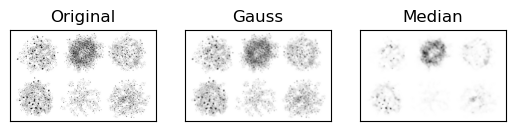

In [44]:
paint = io.imread('https://img.freepik.com/free-vector/grainy-round-grunge-stain-collection_1409-3151.jpg?t=st=1736870975~exp=1736874575~hmac=f73f2f1040b341e34f00dda9a83f34231cd3ddd522d17e6d20eacf1ec071f96c&w=1380')
# Gaussian Filtering
blur_gauss = cv2.GaussianBlur(paint,(15,15),cv2.BORDER_DEFAULT) # kernel size should be odd, may be different in X/Y
# Median Filtering (highly effective in removing salt-and-pepper noise)
blur_median = cv2.medianBlur(paint,21)

plt.subplot(131),plt.imshow(paint),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blur_gauss),plt.title('Gauss')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur_median),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.show()

Median filter almost removed salt and pepper from the image as well. :D